### BÀI THỰC HÀNH PHẦN MUTIL-CLASS SUPPORT VECTOR MACHINE

Ví dụ 1. Chúng ta thực hiện với thư viện Sci-kit learn. Mã lệnh tương tự SoftMargin, chỉ số nhãn (labels) lớn hơn 2. Ta thực hiện ví dụ với dữ liệu nhân tạo dưới đây:

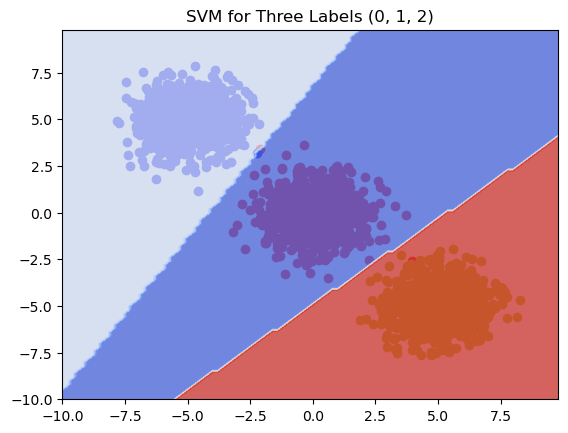

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
N = 1000 # Number of samples
# Create synthetic dataset
X1 = np.random.normal(loc=0, scale=1, size=(N, 2))
Y1 = 0 * np.ones(shape=(1000,)) # LABEL = 0
X2 = np.random.normal(loc=[-5, 5], scale=1, size=(N, 2))
Y2 = 1 * np.ones(shape=(1000,)) # LABEL = 1
X3 = np.random.normal(loc=[5, -5], scale=1, size=(N, 2))
Y3 = 2 * np.ones(shape=(1000,)) # LABEL = 2
# Create stacked dataset
X = np.vstack((X1, X2, X3))
Y = np.hstack((Y1, Y2, Y3))
# TRAIN SVM LEARNING ALGORITHM
clf = SVC(kernel='linear')
clf = clf.fit(X, Y)
# create decision boundary plot
xx, yy = np.meshgrid(
np.arange(-10, 10, 0.2),
np.arange(-10, 10, 0.2))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# PLOT EVERYTHING
plt.scatter(X1[:,0], X1[:,1], color='r')
plt.scatter(X2[:,0], X2[:,1], color='b')
plt.scatter(X3[:,0], X3[:,1], color='y')
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("SVM for Three Labels (0, 1, 2)")
plt.show()

### Bài tập tự thực hành 1

Sử dụng đoạn code trên, tiến hành huấn luyện với 1000 ảnh từ tập chữ số viết tay và thực hiện dự đoán phân loại cho 500 ảnh khác.

Trong bài này, em sẽ sử dụng bộ dữ liệu MNIST từ bộ dữ thư viện của tensorflow

In [ ]:
import numpy as np 
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Em sẽ lấy ngẫu nhiên 1000 ảnh từ chữ số viết tay từ tập train

In [ ]:
random_indices = np.random.choice(train_X.shape[0], 1000, replace = False)
train_X_subset = train_X[random_indices]
train_y_subset = train_y[random_indices]

In [ ]:
train_X_subset = train_X_subset.reshape(train_X_subset.shape[0], -1)
train_X_subset.shape

(1000, 784)

In [ ]:
clf = SVC(kernel="linear")
clf.fit(train_X_subset, train_y_subset)

SVC(kernel='linear')

Sau khi đào tạo mô hình, em sẽ dự đoán phân loại cho 500 ảnh khác.

In [ ]:
random_indices = np.random.choice(test_X.shape[0], 500, replace = False)
test_X_subset = test_X[random_indices]
test_y_subset = test_y[random_indices]

In [ ]:
test_X_subset = test_X_subset.reshape(test_X_subset.shape[0], -1)
test_X_subset.shape

(500, 784)

In [ ]:
predict_labels = clf.predict(test_X_subset)
predict_labels

array([1, 4, 7, 2, 6, 7, 7, 8, 6, 9, 1, 1, 0, 5, 4, 7, 8, 6, 8, 0, 6, 9,
       8, 7, 3, 9, 3, 2, 8, 6, 7, 6, 9, 1, 4, 7, 7, 8, 5, 2, 2, 2, 4, 0,
       0, 2, 1, 1, 2, 0, 5, 6, 9, 5, 0, 2, 9, 1, 6, 2, 8, 6, 1, 3, 9, 8,
       9, 2, 3, 7, 9, 2, 9, 8, 9, 1, 1, 1, 6, 6, 2, 9, 5, 1, 4, 3, 0, 9,
       1, 1, 3, 8, 3, 1, 7, 1, 6, 9, 0, 1, 7, 7, 5, 6, 0, 1, 5, 6, 7, 7,
       5, 5, 8, 3, 5, 6, 4, 4, 9, 3, 2, 1, 9, 1, 2, 9, 1, 7, 0, 1, 5, 1,
       0, 7, 8, 6, 9, 8, 9, 1, 4, 2, 0, 8, 5, 0, 2, 1, 1, 7, 6, 3, 9, 2,
       8, 5, 6, 4, 8, 0, 1, 9, 3, 9, 1, 5, 9, 9, 8, 3, 9, 9, 3, 7, 8, 7,
       3, 5, 1, 9, 8, 7, 8, 2, 3, 5, 2, 0, 5, 0, 4, 9, 9, 0, 2, 6, 0, 2,
       8, 2, 8, 1, 8, 3, 9, 2, 1, 8, 4, 9, 8, 9, 8, 4, 8, 9, 1, 7, 8, 4,
       5, 3, 5, 5, 3, 8, 0, 8, 4, 4, 2, 1, 1, 5, 1, 0, 1, 1, 4, 7, 6, 4,
       2, 3, 7, 1, 6, 3, 2, 5, 7, 5, 2, 4, 8, 0, 2, 4, 6, 0, 9, 1, 6, 1,
       8, 4, 1, 3, 7, 2, 0, 1, 6, 9, 2, 3, 3, 6, 7, 4, 1, 7, 0, 0, 7, 9,
       9, 0, 2, 3, 4, 4, 5, 5, 3, 2, 0, 4, 1, 9, 4,

Đưa ra ma trận confusion matrixs để đưa ra các đánh giá

<AxesSubplot:>

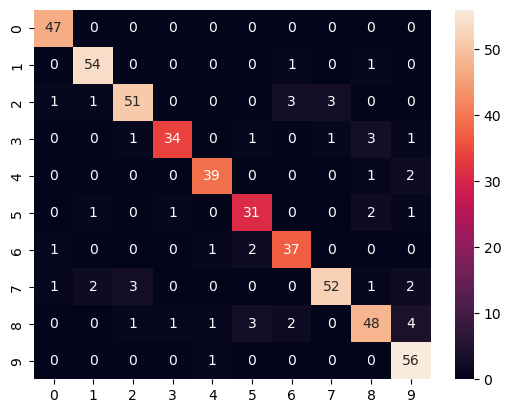

In [ ]:
sn.heatmap(confusion_matrix(test_y_subset, predict_labels), annot=True)

Đưa ra độ chính xác

In [ ]:
print(f"Độ chính xác của mô hình: {accuracy_score(test_y_subset, predict_labels) * 100}%")

Độ chính xác của mô hình: 89.8%


### Ví dụ 2:

Chúng ta tạo một bộ dữ liệu có 25000 mẫu (N=25000), mỗi mẫu có 3000 chiều (d=3000) được phân vào 10 lớp (C = 10), dữ liệu được tạo và phân lớp một cách ngẫu nhiên.

Tiếp theo chúng ta xây dựng các phương thức cần thiết cho phương pháp Multi-Class Vector Machine và tiến hành
thực hiện phân lớp trên bộ dữ liệu nói trên. Trong chương trình này, chúng ta cài đặt phương pháp tiếp cận theo
hướng Hingloss, tức là đưa về bài toán tối ưu toàn cục. Các bạn thực hành để kiểm nghiệm.

Trước hết ta gọi các thư viện cần thiết và tạo dữ liệu – Dữ liệu training sẽ là (X, y):

In [ ]:
import numpy as np
from random import shuffle
N, C, d = 25000, 10, 3000
reg = .05
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

In [ ]:
X.shape, y.shape, W.shape

((3000, 25000), (25000,), (3000, 10))

In [ ]:
# method to compute loss function and its gradient
# here vectorization was used to speed up
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    Z = W.T.dot(X)
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    # Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W * W)
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    # Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

Xây dựng phương pháp lặp Mini Batch Gradient Descent sử dụng hàm thuộc tính Gradient và Loss như trên

In [ ]:
# Mini-batch gradient descent
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
    batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
    # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg)

        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))
    return W, loss_history

Chạy thử và in ra biến thiên của Loss Function, sau đó vẽ lên đồ thị để quan sát

it 1/1000, loss = 1044.409093
it 101/1000, loss = 398.176940
it 201/1000, loss = 130.175807
it 301/1000, loss = 50.545375
it 401/1000, loss = 39.871465
it 501/1000, loss = 28.487014
it 601/1000, loss = 36.752932
it 701/1000, loss = 30.421749
it 801/1000, loss = 28.006107
it 901/1000, loss = 29.502095


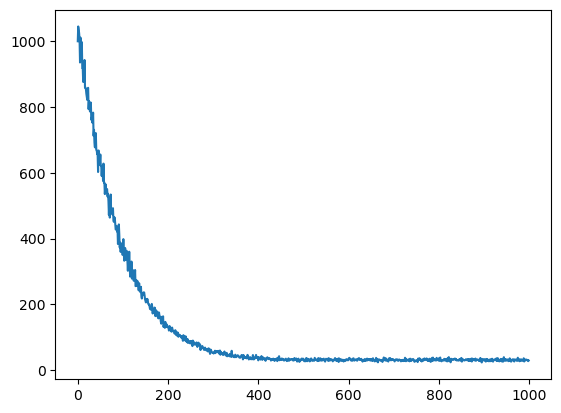

In [ ]:
W, loss_history = multiclass_svm_GD(X, y, W, reg)
import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

### Bài tập thực hành 2:

Hãy tạo tập dữ liệu chỉ có 02 chiều, với các phân loại có phân bố chuẩn (xem lại ví dụ ở các phần trước), số mẫu
mỗi loại là 200. Chạy lại chương trình trên với dữ liệu mới, sau đó hiển thị trực quan để quan sát kết quả.

In [ ]:
import numpy as np

mean = [0, 0]
cov = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean, cov, 200).T
Y0 = 0 * np.ones(shape=(200,)) 


mean = [1, 1]
cov = [[4, 0], [0, 4]]
x2 = np.random.multivariate_normal(mean, cov, 200).T
Y1 = 1 * np.ones(shape=(200,)) 

X = np.hstack((x1, x2))
Y = np.hstack((Y0, Y1))

In [ ]:
reg = 0.05
C = 3
d = 2
N = 200 # Number of samples
# Create synthetic dataset
X1 = np.random.normal(loc=0, scale=1, size=(N, 2))
Y1 = 0 * np.ones(shape=(200,)) # LABEL = 0
X2 = np.random.normal(loc=[-5, 5], scale=1, size=(N, 2))
Y2 = 1 * np.ones(shape=(200,)) # LABEL = 1
X3 = np.random.normal(loc=[5, -5], scale=1, size=(N, 2))
Y3 = 2 * np.ones(shape=(200,)) # LABEL = 2
# Create stacked dataset
X = np.vstack((X1, X2, X3)).T
Y = np.hstack((Y1, Y2, Y3))

W = np.random.randn(2, 3)

In [ ]:
X.shape, Y.shape, W.shape

((2, 600), (600,), (2, 3))

In [ ]:
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    Z = W.T.dot(X)
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    # Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W * W)
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    # Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
    batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
    # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg)

        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))
    return W, loss_history

it 1/1000, loss = 0.943381
it 101/1000, loss = 0.713919
it 201/1000, loss = 0.752213
it 301/1000, loss = 0.567272
it 401/1000, loss = 0.570028
it 501/1000, loss = 0.681844
it 601/1000, loss = 0.702457
it 701/1000, loss = 0.645415
it 801/1000, loss = 0.674320
it 901/1000, loss = 0.661513


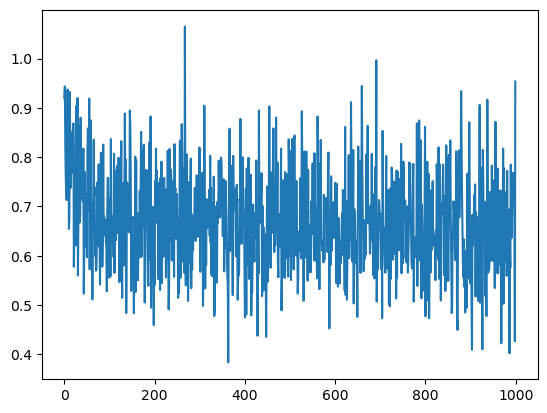

In [ ]:
W, loss_history = multiclass_svm_GD(X, Y.astype(int), W, reg)
import matplotlib.pyplot as plt
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()

### Bài tập thực hành 3:



Xem lại các bài ví dụ phần trước, sử dụng bộ trọng số W đã tính được và dự đoán các phân lớp y ứng với dữ liệu X
trên chính tập dữ liệu ngẫu nhiên vừa tạo. Đưa ra độ chính xác Accuracy và ma trận nhầm lẫn Confusion Matrix.

In [ ]:
W

array([[ 0.11207205, -0.24944335,  0.14862666],
       [ 0.16189112,  0.13149837, -0.3085425 ]])

In [ ]:
predict = W.T.dot(X)
predict

array([[ 6.31971853e-02, -1.00192665e-01,  1.40628363e-01, ...,
        -3.91601278e-01, -2.94999023e-02, -4.72437353e-01],
       [-6.13103161e-02,  4.21784029e-02,  2.76024490e-01, ...,
        -1.62954797e+00, -1.76339518e+00, -2.12065048e+00],
       [-6.07896152e-04,  5.95007491e-02, -4.40149237e-01, ...,
         2.14156301e+00,  1.90674946e+00,  2.74823977e+00]])

In [ ]:
predict_labels = np.argmax(predict, axis=0)
predict_labels

array([0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1,
       0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

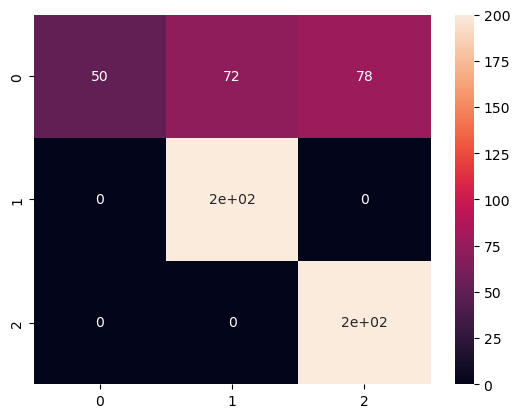

In [ ]:
sn.heatmap(confusion_matrix(Y.astype('int64'), predict_labels), annot=True)

In [ ]:
print(f"Độ chính xác của mô hình: {accuracy_score(Y.astype('int64'), predict_labels) * 100}%")

Độ chính xác của mô hình: 75.0%
